In [1]:
# https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190702

In [76]:
# import pandas
import pandas as pd

In [79]:
# read history price from html page
bc_url = 'https://coinmarketcap.com/currencies/\
bitcoin/historical-data/?start=20130428&end=20190702'

bc = pd.read_html(bc_url)[0]
bc.head(3)

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jul 02, 2019",10588.68,10912.19,9737.88,10801.68,31015895223,192206536806
1,"Jul 01, 2019",10796.93,11206.44,10089.31,10583.13,29378589324,188297637574
2,"Jun 30, 2019",11931.99,12178.38,10799.01,10817.16,27256473494,192442065810


In [80]:
bc.dtypes

Date           object
Open*         float64
High          float64
Low           float64
Close**       float64
Volume         object
Market Cap      int64
dtype: object

In [81]:
# convert to datetime data and set index for date time data
bc.Date = pd.to_datetime(bc.Date)
bc = bc.set_index('Date')
bc.head(3)

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2019-07-02,10588.68,10912.19,9737.88,10801.68,31015895223,192206536806
2019-07-01,10796.93,11206.44,10089.31,10583.13,29378589324,188297637574
2019-06-30,11931.99,12178.38,10799.01,10817.16,27256473494,192442065810


In [82]:
# sort index so small time at the top
bc.sort_index(inplace=True)
bc.head(3)

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,1488566728
2013-04-29,134.44,147.49,134.00,144.54,-,1603768865
2013-04-30,144.00,146.93,134.05,139.00,-,1542813125


In [73]:
bc.loc['2017-12-31']

Open*              12897.7
High               14377.4
Low                12755.6
Close**            14156.4
Volume         12136299520
Market Cap    237465823980
Name: 2017-12-31 00:00:00, dtype: object

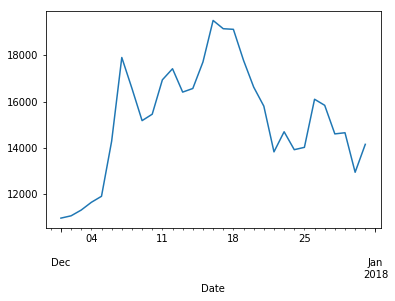

In [75]:
bc.loc['2017-12']['Close**'].plot()

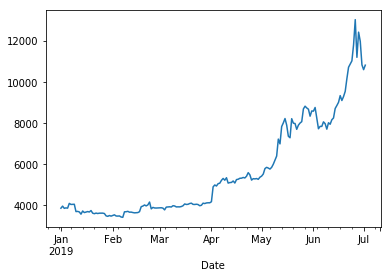

In [83]:
# select one year
%matplotlib inline
bc.loc['2019','Close**'].plot()

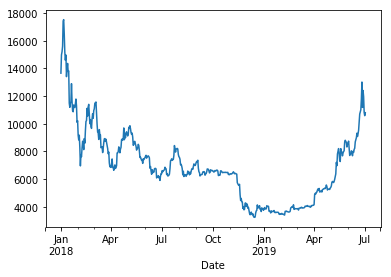

In [84]:
# select 2 year with slicing
bc.loc['2018':'2019', 'Close**'].plot()

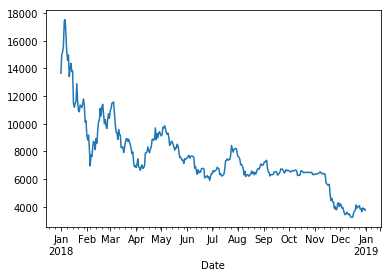

In [109]:
# select price in 2018 and plot
bc_2018 = bc.loc['2018']
bc_2018['Close**'].plot()

In [120]:
# resample close price by month with mean function
bc_2018.resample('M').mean().shape
bc_2018.shape

(365, 6)

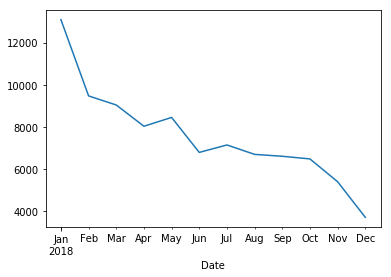

In [122]:
bc_2018.resample('M').mean()['Close**'].plot()

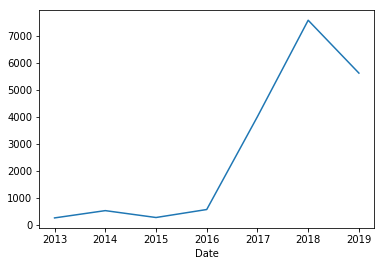

In [124]:
bc.resample('Y').mean()['Close**'].plot()

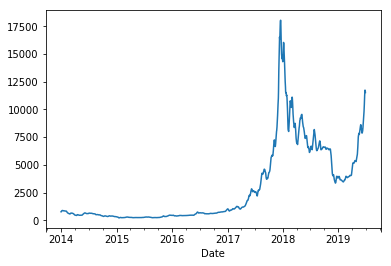

In [54]:
# rolling
bc_7day = bc['Close**'].rolling(7, center=True).mean()
bc_7day.plot()